# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atomosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anteror permite describir de un a manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) para realizar la integración del sistema de ecuaciones diferenciales

1. Importe las librerias odeint, numpy, matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

2. Defina una función con el sistema de ecuaciones a integrar, para ello construya el siguiente el sistema de ecuaciones en una función:


Puede ser escrito como:

\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}\\
\frac{\mathrm{d}U_3}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
\sigma (U_1-U_0)\\
U_0(\rho-U_2)\\
xy-\beta z\\
\end{bmatrix}
\end{equation}


In [ ]:
def lorentz(u, t, s, r ,b):

  dx = s * (u[1] - u[0])
  dy = u[0] * (r - u[2] )
  dz = u[0] * u[1] - b * u[2]

  return dx, dy, dz


u0 = [1.5,1.5,1.5]

In [ ]:
t = np.linspace(0,30, 100000)

In [ ]:
s = 10.0
b = 8./3
r = 28
params = (s, b ,r)

In [ ]:
lorentz(u0, t, *params)

(0.0, 1.7499999999999998, -39.75)

In [ ]:
u = odeint(lorentz, u0, t, args=(s,r,b))

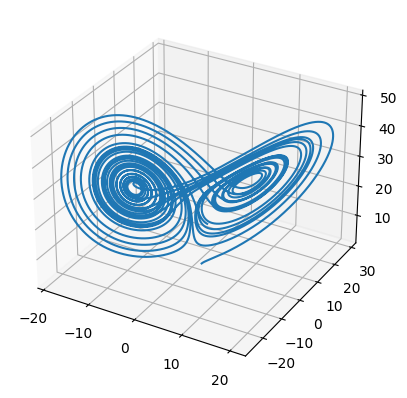

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(u[:,0],u[:,1],u[:,2])
plt.draw()
plt.show()

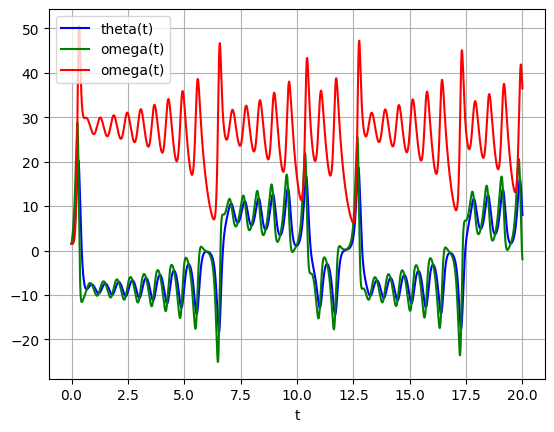

In [ ]:
plt.plot(t, u[:, 0], 'b', label='theta(t)')
plt.plot(t, u[:, 1], 'g', label='omega(t)')
plt.plot(t, u[:, 2], 'r', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()



3. Solucione el sistema de ecuaciones para los siguientes parámetros y  realice un gráfico en 3D de la solución, empleando el código de más abajo.

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 28$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1.5,1.5]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1,5,1.5]$


- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1001,1.001,1.001]$

```
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x,y,z)
plt.draw()
plt.show()
```



In [ ]:
#condiciones iniciales 1
r = 28
u0 = [1.5,1.5,1.5]

In [ ]:
u = odeint(lorentz, u0, t, args=(s,r,b))

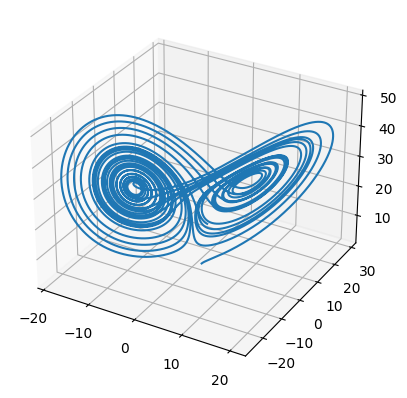

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(u[:,0],u[:,1],u[:,2])
plt.draw()
plt.show()

In [ ]:
#condiciones iniciales 2
r = 25
u0 = [1.5,1.5,1.5]

In [ ]:
u = odeint(lorentz, u0, t, args=(s,r,b))

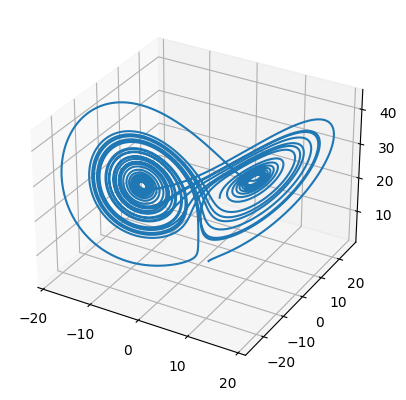

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(u[:,0],u[:,1],u[:,2])
plt.draw()
plt.show()

In [ ]:
#condiciones iniciales 3
r = 25
u0 = [1,1,1]

In [ ]:
u = odeint(lorentz, u0, t, args=(s,r,b))

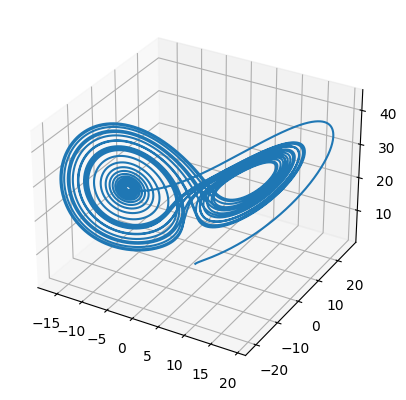

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(u[:,0],u[:,1],u[:,2])
plt.draw()
plt.show()

In [ ]:
#condiciones iniciales 4
r = 28
u0 = [1.001,1.001,1.001]

In [ ]:
u = odeint(lorentz, u0, t, args=(s,r,b))

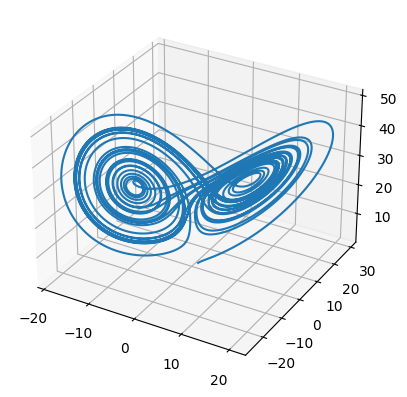

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(u[:,0],u[:,1],u[:,2])
plt.draw()
plt.show()


5. ¿Cómo puede estar seguro de que la solución es la esperada?

Un atractor caótico es un problema de condiciones iniciales. Entonces, lo esperado al variar las condiciones es que las trayectorias del atractor no sean las mismas (por minima que sea la variación) lo cual se evidencia entre el atractor con condiciones iniciales 3 y el 4

In [ ]:
s = 10.
b = 8./3
r = 28

In [ ]:
u0 = [0.999,0.999,0.999]

In [ ]:
u = odeint(lorentz, u0, t, args=(s,r,b))

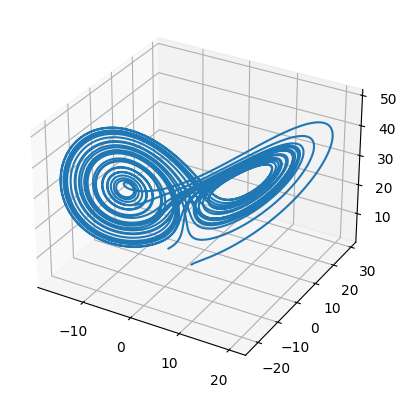

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(u[:,0],u[:,1],u[:,2])
plt.draw()
plt.show()